In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# Problem 1

Hypothesis: As kurtosis and skewness functions in the scipy package have the parameter 'biased', which means we can choose whether we want biased or unbiased functions. So we assume that if we set 'biased=False', the functions are unbiased and if we set 'biased=True' then the functions are biased.


In [2]:
from scipy.stats import kurtosis, skew

Generate data from normal distribution:

In [3]:
s = np.random.normal(0,1,100)


Calculate kurtosis and skewness and set parameter 'biased' True

In [4]:
print("Biased kurtosis: ", kurtosis(s, bias=True))
print("Biased skewness: ", skew(s,bias=True))

Biased kurtosis:  -0.07962184753124157
Biased skewness:  0.11730310520071117


Calculate kurtosis and skewness and set parameter 'biased' True

In [5]:
print("Unbiased kurtosis: ",kurtosis(s, bias=False))
print("Unbiased kurtosis: ",skew(s,bias=False))

Unbiased kurtosis:  -0.02126434393697485
Unbiased kurtosis:  0.11909705715133045


So even when we set the parameter biased=False, the functions are biased.

# Problem 2
Import the data:

In [6]:
prob_2 = pd.read_csv("problem2.csv")

In [7]:
x_t = np.array(prob_2.x).reshape(1,100)
x = np.transpose(x_t)
y = np.transpose(np.array(prob_2.y))
y = y.reshape(100,1)



Calculate $/beta$ using OLS:

In [8]:
beta = np.linalg.inv(np.matmul(x_t,x))

beta = np.matmul(beta, x_t)
beta = np.matmul(beta, y)

Calculate the error vector:

In [9]:
y_hat = np.matmul(x, beta)
error = y - y_hat

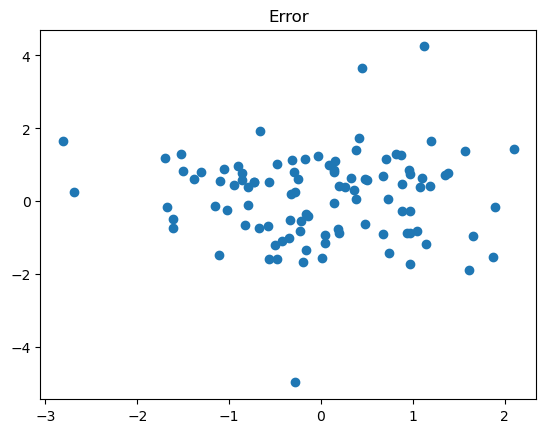

In [10]:
plt.scatter(x,error)
plt.title("Error")
plt.show()

Test the normality of the error vector:


In [11]:
error_mean = np.mean(error)
error_sigma = np.sqrt(sum(np.square(error))/100)


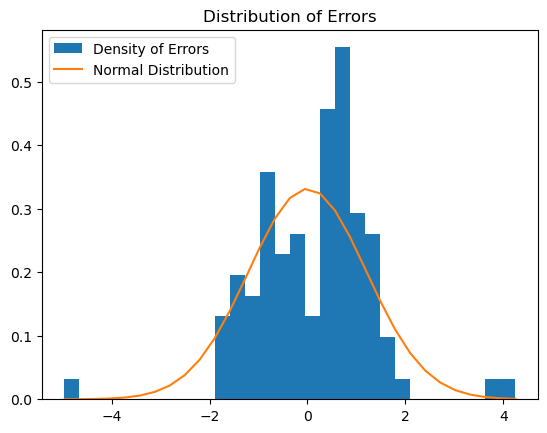

In [12]:
count,bins, ignored = plt.hist(error, bins=30,density=True, label = "Density of Errors")
norm_bins = (1/(error_sigma * np.sqrt(2 * np.pi))) *np.exp( - (bins)**2 / (2 * error_sigma**2))
plt.plot(bins, norm_bins, label="Normal Distribution" )
plt.legend()
plt.title("Distribution of Errors")
plt.show()


In [13]:
from scipy.stats import normaltest
k2, p = normaltest(error)
alpha = 1e-3
if (p>= alpha):
    print("The error follows the normal distribution")
else: print("The error does not follow the normal distribution")

The error does not follow the normal distribution


Calculate $/beta$ using MLE given the assumption of normality:

In [14]:
def errfun(b):
    return y - b*x

def normal(x,sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - x**2 / (2* sigma**2))
def lld_normal(param):
    beta, sigma = param
    return -sum(np.log(normal(errfun(beta),sigma)))

In [15]:
from scipy.optimize import minimize
res_normal = minimize(lld_normal, x0=np.array([0.5,0.5]),method='L-BFGS-B')
beta_normal = res_normal['x'][0]


Calculate $/beta$ using MLE given the assumption of T distribution:


In [16]:
from scipy.stats import t
def lld_t(param):
    beta = param
    return -sum(np.log(t.pdf(errfun(beta), len(x)-1)))
res_t = minimize(lld_t, x0=np.array([0.5]))
beta_t = res_t['x']

Evaluate the fitted parameters:


In [17]:
from sklearn.metrics import r2_score
mse_ols = sum(np.square(error))
mse_normal = sum(np.square(errfun(beta_normal)))
mse_t = sum(np.square(errfun(beta_t)))
print("MSE for the OLS: ",mse_ols[0])
print("MSE for the MLE with normality assumption: ",mse_normal[0])
print("MSE for the MLE with T distribution assumption: ",mse_t[0])
print("R^2 score for the OLS: ",r2_score(y,beta*x))
print("R^2 score for the MLE with normality assumption: ",r2_score(y,beta_normal*x)),
print("R^2 score for the MLE with T distribution assumption: ", r2_score(y,beta_t*x))

MSE for the OLS:  145.05091997840898
MSE for the MLE with normality assumption:  145.0509199784091
MSE for the MLE with T distribution assumption:  145.06240674119238
R^2 score for the OLS:  0.18658635122426193
R^2 score for the MLE with normality assumption:  0.1865863512242617
R^2 score for the MLE with T distribution assumption:  0.1865219359856023


In [18]:
print("The OLS beta estimation is: ", beta[0][0])
print("The MLE beta estimation using the assumption of normality is: ", beta_normal)
print("The OLS beta estimation using the assumption of T distribution is: ", beta_t[0])

The OLS beta estimation is:  0.6051912114646785
The MLE beta estimation using the assumption of normality is:  0.6051911880524392
The OLS beta estimation using the assumption of T distribution is:  0.5941813674400015


The results are very closed.The first two results are almost the same and fits better.  Breaking of the normality assumption may not have significant impact in this case because the results third method is very close to the first two methods.

# Problem 3
Simulate AR(1), AR(2) and AR(3):


In [19]:
e = np.random.normal(0,0.1,1000)

def AR1(burn_in,  beta, e):
    y_t = np.ones(burn_in)

    for i in range(1, burn_in):
        y_t[i] = 1 + beta*y_t[i-1] + e[i]
    return y_t

def AR2(burn_in,  beta, e):
    y_t = np.ones(burn_in)
    for i in range(2, burn_in):
        y_t[i] = 1 + beta[0]*y_t[i-1] + beta[1]*y_t[i-2] + e[i]
    return y_t

def AR3(burn_in,  beta, e):
    y_t = np.ones(burn_in)
    for i in range(3, burn_in):
        y_t[i] = 1 + beta[0]*y_t[i-1] + beta[1]*y_t[i-2] + beta[2] * y_t[i-3] + e[i]
    return y_t






In [20]:
burn_in = 500
beta_ar1 = 0.5
beta_ar2 = [0.3, 0.2]
beta_ar3 = [0.2, 0.2,0.1]
y_ar1 = AR1(burn_in,  beta_ar1,e)
y_ar2 = AR2(burn_in,  beta_ar2,e)
y_ar3 = AR3(burn_in,  beta_ar3,e)

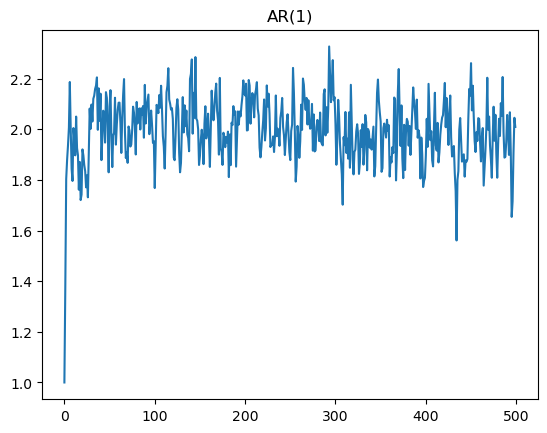

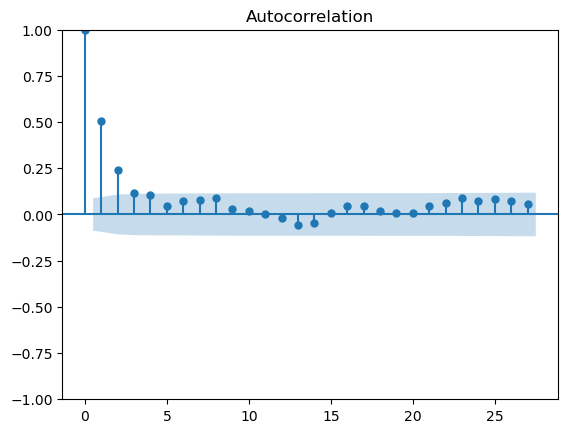

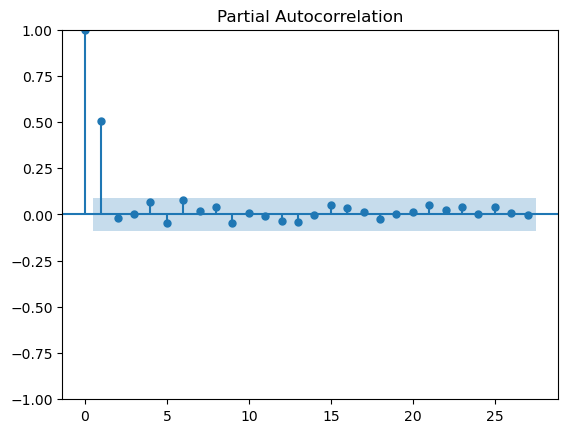

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf\


plt.plot(y_ar1)
plt.title('AR(1)')
plot_acf(y_ar1)
plot_pacf(y_ar1,method='ywm')
plt.show()
#plot_pacf(y_ar1)

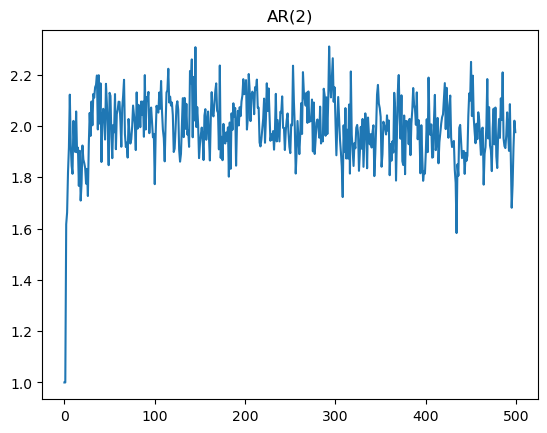

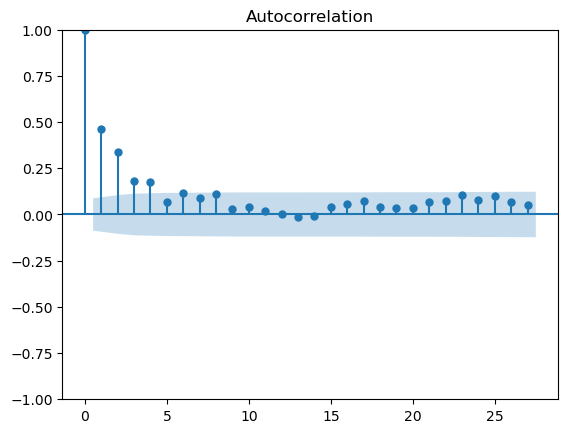

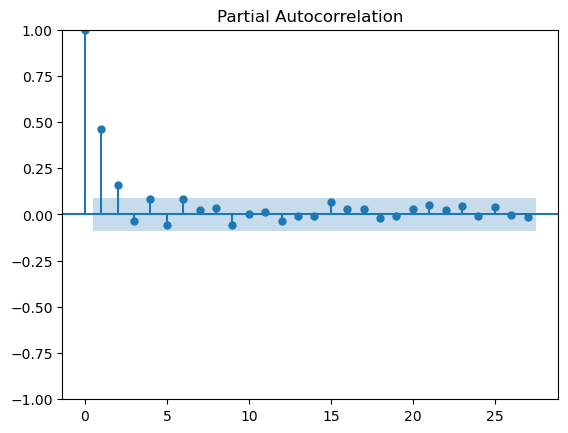

In [22]:
plt.plot(y_ar2)
plt.title('AR(2)')
plot_acf(y_ar2)
plot_pacf(y_ar2,method='ywm')
plt.show()


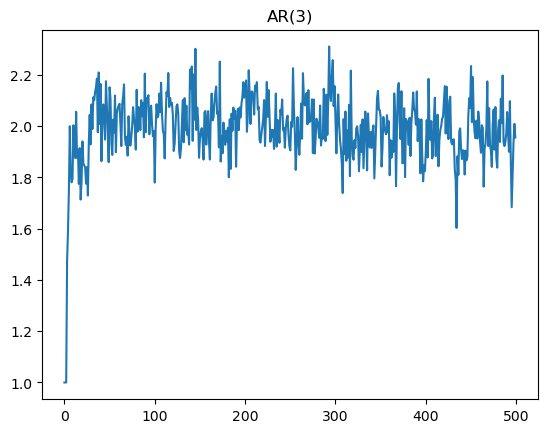

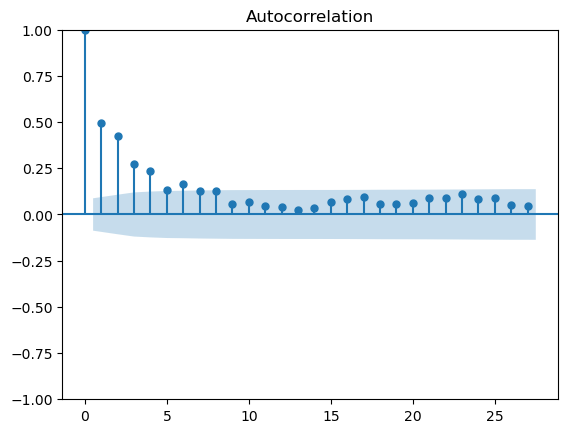

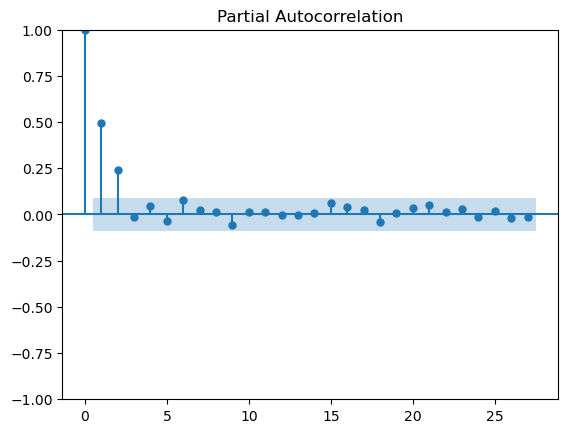

In [23]:
plt.plot(y_ar3)
plt.title('AR(3)')
plot_acf(y_ar3)
plot_pacf(y_ar3,method='ywm')
plt.show()

Simulate MA(1), MA(2) and MA(3):

In [24]:

def MA1(burn_in, beta, e):
    y_t = np.ones(burn_in)

    for i in range(1, burn_in):
        y_t[i] = 1 + beta*e[i-1]
    return y_t


def MA2(burn_in, beta, e):
    y_t = np.ones(burn_in)


    for i in range(2, burn_in):
        y_t[i] = 1 + beta[0]*e[i-1] + beta[1]*e[i-2]
    return y_t

def MA3(burn_in,  beta, e):
    y_t = np.ones(burn_in)

    for i in range(3, burn_in):
        y_t[i] = 1 + beta[0]*e[i-1] + beta[1]*e[i-2] + beta[2] * e[i-3]
    return y_t


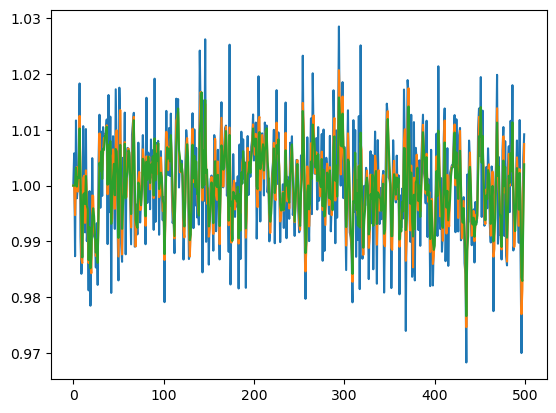

In [25]:
burn_in = 500
beta_ma1 = 0.1
beta_ma2 = [0.06, 0.04]
beta_ma3 = [0.05, 0.03,0.02]
y_ma1 = MA1(burn_in,  beta_ma1,e)
y_ma2 = MA2(burn_in, beta_ma2,e)
y_ma3 = MA3(burn_in,  beta_ma3,e)
plt.plot(y_ma1)
plt.plot(y_ma2)
plt.plot(y_ma3)
plt.show()

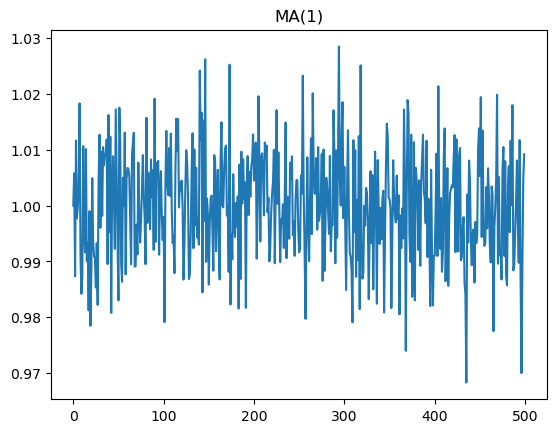

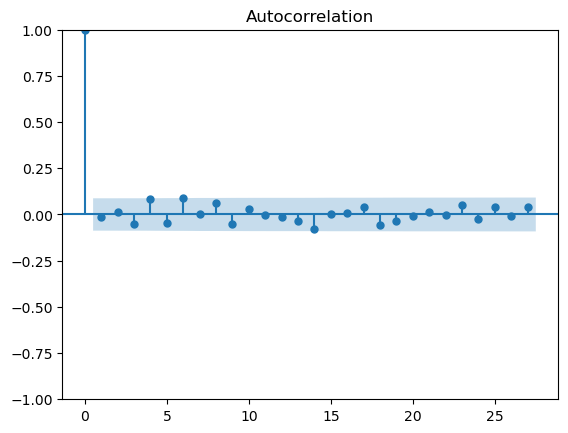

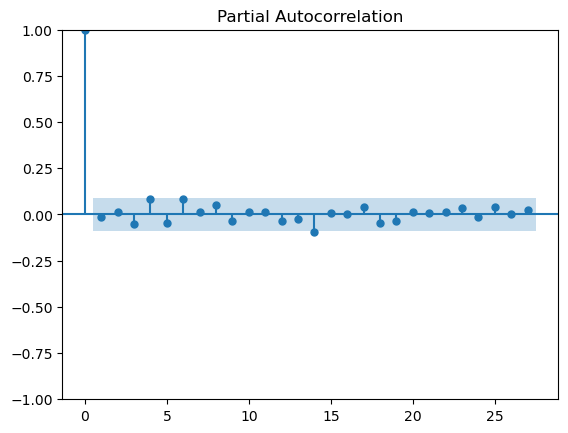

In [26]:
plt.plot(y_ma1)
plt.title("MA(1)")
plot_acf(y_ma1)
plot_pacf(y_ma1, method='ywm')
plt.show()

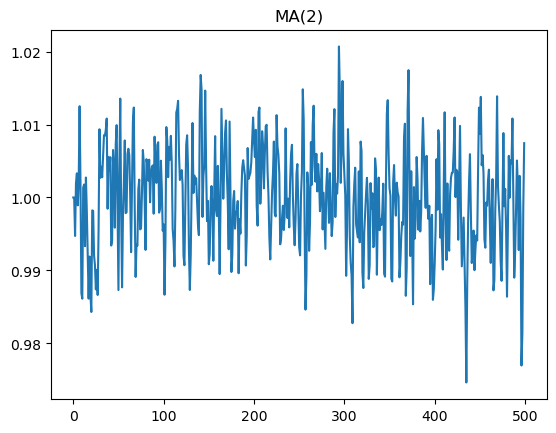

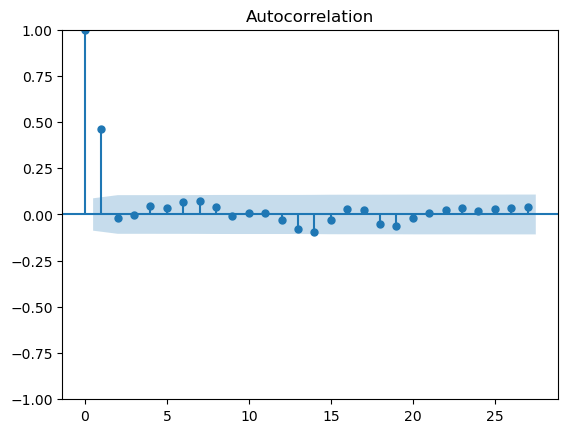

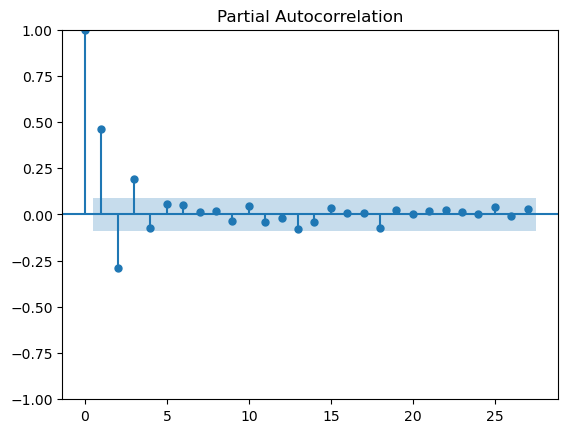

In [27]:
plt.plot(y_ma2)
plt.title("MA(2)")
plot_acf(y_ma2)
plot_pacf(y_ma2,method='ywm')
plt.show()

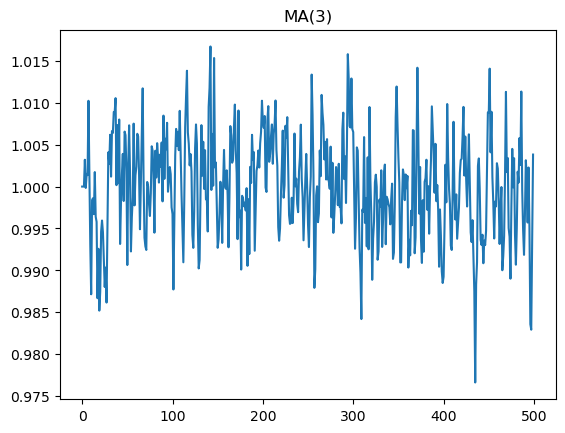

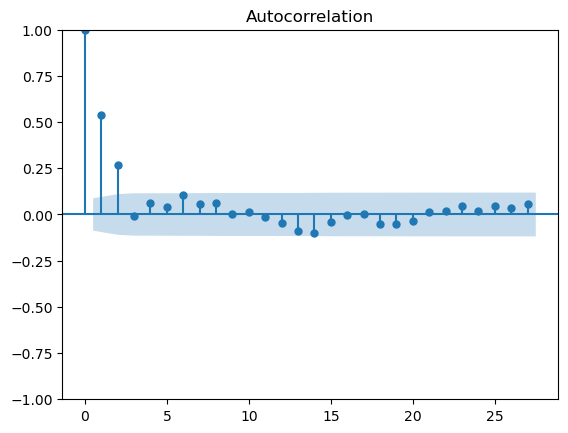

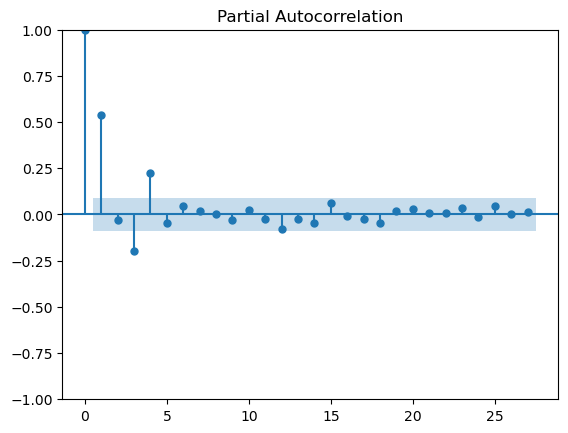

In [28]:
plt.plot(y_ma3)
plt.title("MA(3)")
plot_acf(y_ma3)
plot_pacf(y_ma3,method='ywm')
plt.show()

Conclusion:
- The ACF functions of AR(p) models will asymptotically go to zero and the PCAF functions will go close to zero after first p terms.
- The ACF functions of MA(p) models will go close to zero after first p terms and the PCAF functions will asymptotically go to zero.